### Problem Statement: 
Forecasting Monthly Restaurant Sales Using Time Series Analysis

### Context
A popular restaurant is looking to enhance its business operations and optimize inventory management. To achieve this, they require accurate sales forecasts for the upcoming year. Reliable sales predictions can help them manage inventory, staff, and promotional activities efficiently. The restaurant has historical monthly sales data, and they want to develop a robust time series analysis model to forecast future sales accurately.

Create a time series analysis model to forecast monthly restaurant sales for the next 6 months.

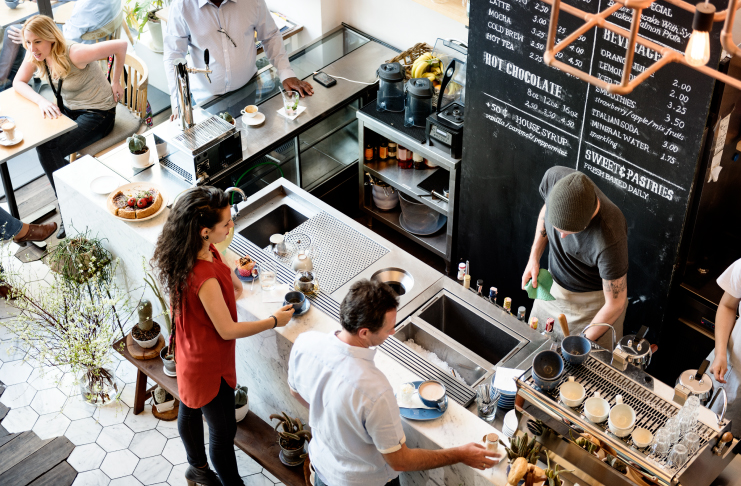

### 1. Import Necessary Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from warnings import filterwarnings
filterwarnings('ignore')

### 2. Prepare the Data:

In [2]:
df = pd.read_csv('Restaurant Sales.csv')
df.head()

,Date,Sales
0,1/31/2010,1764.052346
1,2/28/2010,2400.157208
2,3/31/2010,4442.839599
3,4/30/2010,6240.893199
4,5/31/2010,5331.659605


In [3]:
# Printing bottom 5 records
df.tail()

,Date,Sales
151,8/31/2022,286.657278
152,9/30/2022,4208.856437
153,10/31/2022,4826.438539
154,11/30/2022,3562.554140
155,12/31/2022,2663.478286


In [4]:
# Checking the shape of the dataset
df.shape

(156, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    156 non-null    object 
 1   Sales   156 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


we can see that the Date column is in object datatype we need to convert it into Date time 

### 3. Data Preprocessing 

In [6]:
# Converting Date column object to datetime format
df['Date'] = pd.to_datetime(df.Date)

In [7]:
# Just checking start date and end date
print('Start Date =',df.Date.min())
print('End Date =',df.Date.max())

Start Date = 2010-01-31 00:00:00
End Date = 2022-12-31 00:00:00


In [8]:
# Generate a time index
start_date = '2010-01-31'
end_date = '2022-12-31'

# Create a DatetimeIndex with Monthly frequency
df['Date'] = pd.date_range(start=start_date, end=end_date, freq='M')

In [9]:
# Making a copy
df_copy = df.copy(deep=True)

In [10]:
# Setting Date column to index
df = df.set_index('Date')

In [11]:
df.head()

,Sales
Date,
2010-01-31,1764.052346
2010-02-28,2400.157208
2010-03-31,4442.839599
2010-04-30,6240.893199
2010-05-31,5331.659605


In [12]:
df.isnull().sum()

Sales    0
dtype: int64

### 4. Visualize the Data

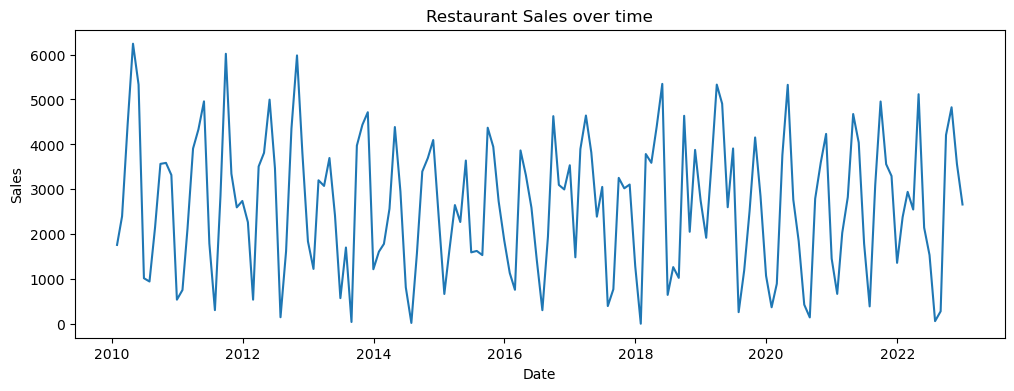

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(df['Sales'])
plt.title('Restaurant Sales over time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

### 5. Time Series Decomposition:
To understand the trend and seasonality in your data, you can perform time series decomposition:

Before performing time series decomposition we want to explicitly set the frequency for Monthly data,

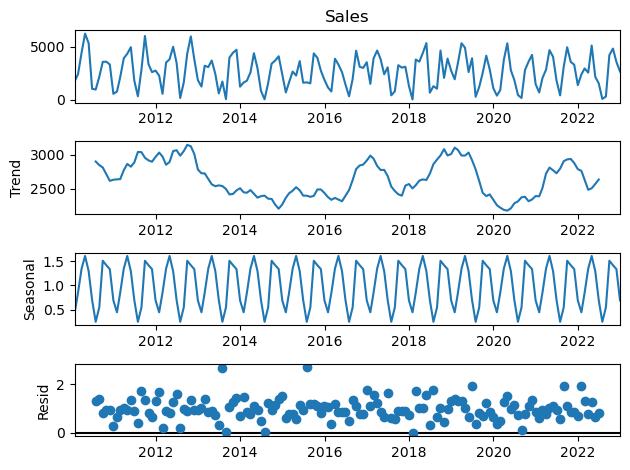

In [18]:
# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(df['Sales'], model='multiplicative')
fig = decomposition.plot()
plt.show()

### 6. Check for Stationary

#### 1. Using Rolling Statistics

In [19]:
df['rollMean'] = df.Sales.rolling(window = 12).mean()
df['rollstd'] = df.Sales.rolling(window = 12).std()

In [21]:
df.head(20)

,Sales,rollMean,rollstd
Date,,,
2010-01-31,1764.052346,NaN,NaN
2010-02-28,2400.157208,NaN,NaN
2010-03-31,4442.839599,NaN,NaN
2010-04-30,6240.893199,NaN,NaN
2010-05-31,5331.659605,NaN,NaN
2010-06-30,1022.722120,NaN,NaN
2010-07-31,950.088417,NaN,NaN
2010-08-31,2151.357208,NaN,NaN
2010-09-30,3567.320467,NaN,NaN


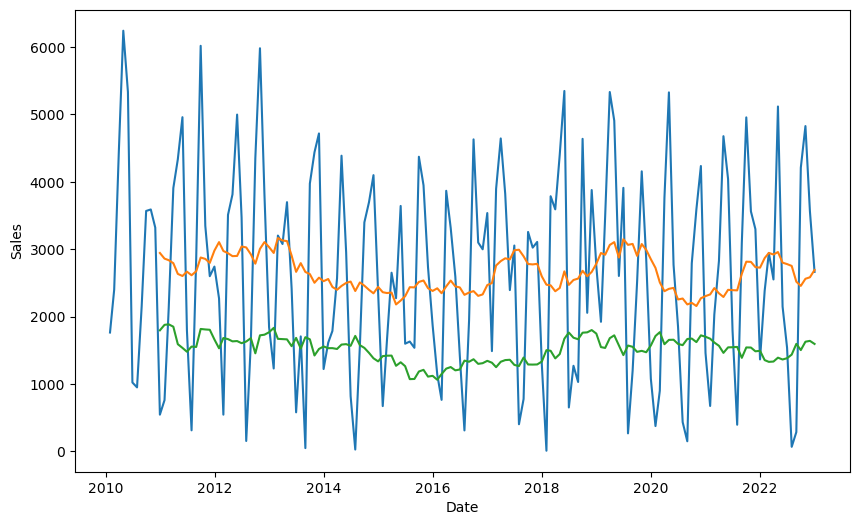

In [24]:
plt.figure(figsize=(10,6))
sns.lineplot(data= df, x = df.index,y = df['Sales'])
sns.lineplot(data= df, x = df.index,y = df['rollMean'])
sns.lineplot(data= df, x = df.index,y = df['rollstd'])
plt.show()

### 2. Using ADF[Augmented Dickey–Fuller Test]

In [25]:
from statsmodels.tsa.stattools import adfuller

In [26]:
adfTest  = adfuller(df['Sales'])
adfTest

(-2.993338023580662,
 0.03552124620649767,
 14,
 141,
 {'1%': -3.4776006742422374,
  '5%': -2.882265832283648,
  '10%': -2.5778219289774156},
 2370.5143199848603)

In [27]:
stats = pd.Series(adfTest[0:4],index = ['Test Statistic','p-value','No.lags used','number of observations used'])
stats 

Test Statistic                  -2.993338
p-value                          0.035521
No.lags used                    14.000000
number of observations used    141.000000
dtype: float64

In [28]:
for i,j in adfTest[4].items():
    print('criticality',i,':',j)

criticality 1% : -3.4776006742422374
criticality 5% : -2.882265832283648
criticality 10% : -2.5778219289774156


You can see that Test Statistic is lesser than criticality that means that the data is stationary and the p-value < 0.05 (level of significance)

In [29]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF Test
ADF_result = adfuller(df['Sales'])

# Extract and print the p-value
p_value = ADF_result[1]

print(f'p-value: {p_value}')

# Interpret the results
if p_value <= 0.05:
    print("Null hypothesis rejected. The data is stationary.")
else:
    print("Null hypothesis not rejected. The data is not stationary.")


p-value: 0.03552124620649767
Null hypothesis rejected. The data is stationary.


### 7. Now will Check for AutoCorrelation using ACF and PACF 

**AutoCorrelation Function (ACF):**
1. ACF measures the correlation between a time series and its own lagged values. 
2. ACF plots show how many past observations influence the current observation. it uses both Direct and Indirect effect
3. It is mainly used to determine the order of Moving Average(MA) Component in a time series model.

**Partial AutoCorrelation Function (PACF):**
1. PACF measures the correlation between a time series and its own lagged values, but it removes the effects of intermediate lags. It focuses on the direct relationship between observations at different time lags.
2. PACF helps determine the order of the AR component in a time series model by selecting the direct influence of past observations.

<Figure size 1200x600 with 0 Axes>

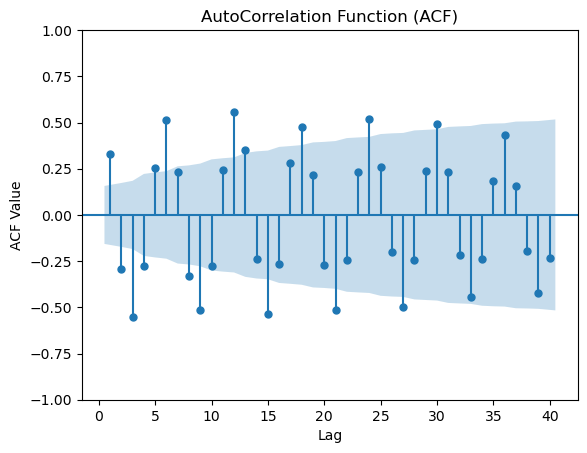

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(df['Sales'], lags = 40,zero = False)  # You can adjust the number of lags to display
plt.title('AutoCorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF Value')
plt.show()

<Figure size 1200x600 with 0 Axes>

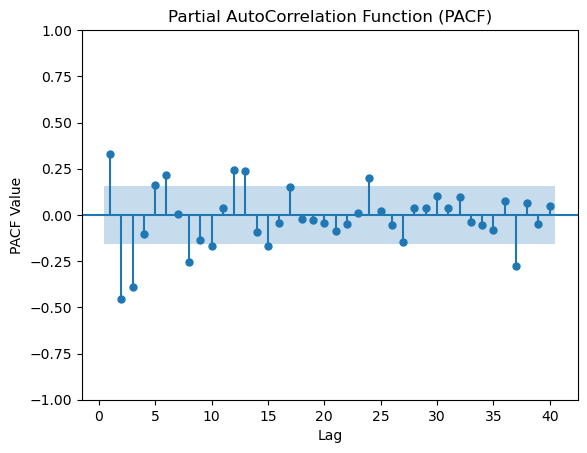

In [31]:
# Plot the PACF (Partial AutoCorrelation Function)
plt.figure(figsize=(12, 6))
plot_pacf(df['Sales'], lags=40,zero=False)  # You can adjust the number of lags to display
plt.title('Partial AutoCorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF Value')
plt.show()


Let me take lag as 37. the more the lag the better the performance of the model but always select the lag which has high significance

### 8. Spliting the Dataset in to train and test

In [32]:
df.shape

(156, 3)

In [48]:
round(df.shape[0]*.8)

125

#### I will consider 150 records for training set and 6 records for testing set

In [57]:
train = df.iloc[:150]
test = df.iloc[150:]

In [58]:
print(train.shape,test.shape)

(150, 3) (6, 3)


### 9. Model Building 

### What are the Different time series model and its strengths and use cases

### 1. AR (AutoRegressive) Model:

- Use when your time series data shows autocorrelation, meaning that past values are correlated with future values.
- AR models use past observations as predictors for future values, and the order of the model (denoted as p) determines how many past observations are considered.
- AR(p) models are useful for stationary time series data.

### 2. MA (Moving Average) Model:
- Use when your time series data has a moving average component, where the current value depends on past white noise.
- MA models use past white noise terms as predictors for future values, and the order of the model (denoted as q) determines how many past white noise terms are considered.
- MA(q) models are also useful for stationary time series data.

### 3. ARMA (AutoRegressive Moving Average) Model:
- Use when your time series data exhibits both autocorrelation and a moving average component.
- ARMA models combine the AR and MA components into a single model, with two orders, p (for the autoregressive part) and q (for the moving average part).
- ARMA(p, q) models are suitable for stationary time series data
### 4. ARIMA (AutoRegressive Integrated Moving Average) Model:
- Use when your time series data is not stationary (i.e., it exhibits trends or seasonality) and requires differencing to make it stationary.
- ARIMA models include three components: AR (autoregressive), I (integration, denoted as d), and MA (moving average). The order of differencing (d) is used to make the data stationary.
- ARIMA(p, d, q) models are appropriate for non-stationary time series data.

Overall:-

- 1. If your data is stationary and exhibits autocorrelation, use an AR model (AR(p)).
- 2. If your data is stationary and has a moving average component, use an MA model (MA(q)).
- 3. If your data is stationary and exhibits both autocorrelation and a moving average component, use an ARMA model (ARMA(p, q)).
- 4. If your data is not stationary and needs differencing to become stationary, use an ARIMA model (ARIMA(p, d, q)).

### Now will build AutoARIMA Model

In [59]:
train.head()

,Sales,rollMean,rollstd
Date,,,
2010-01-31,1764.052346,NaN,NaN
2010-02-28,2400.157208,NaN,NaN
2010-03-31,4442.839599,NaN,NaN
2010-04-30,6240.893199,NaN,NaN
2010-05-31,5331.659605,NaN,NaN


In [60]:
# Perform AutoARIMA
import pandas as pd
from pmdarima import auto_arima

model = auto_arima(train['Sales'], seasonal=True, m=12)  # Set seasonal=True for seasonal data with period m=12 (monthly data)

In [61]:
# Summary of the best model
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  150
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 12)   Log Likelihood               -1268.231
Date:                            Mon, 12 Feb 2024   AIC                           2546.462
Time:                                    20:37:05   BIC                           2561.515
Sample:                                01-31-2010   HQIC                          2552.578
                                     - 06-30-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    664.6034    207.649      3.201      0.001     257.618    1071.588
ar.L1         -0.0621      0.086   

In [62]:
test.shape

(6, 3)

In [63]:
# Make forecast
test['prediction_AA'] = model.predict(n_periods=6)  # Forecast the next 6 periods
test

,Sales,rollMean,rollstd,prediction_AA
Date,,,,
2022-07-31,68.241605,2751.849737,1436.312558,968.044485
2022-08-31,286.657278,2517.982718,1595.372695,1764.706163
2022-09-30,4208.856437,2455.774154,1503.606733,3482.066932
2022-10-31,4826.438539,2561.260007,1627.463985,3317.947030
2022-11-30,3562.554140,2583.353842,1640.116904,3484.803110
2022-12-31,2663.478286,2691.562985,1594.629187,1691.505433


<Axes: xlabel='Date', ylabel='Sales'>

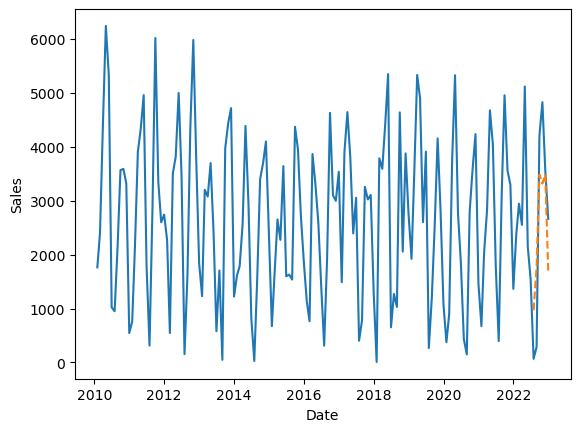

In [65]:
sns.lineplot(data = df, x = df.index, y = df['Sales'])
sns.lineplot(data = test, x = test.index, y = test['prediction_AA'], linestyle='--')


### Now will Fit an AR Model

p = 16,d = 0, q = 9

In [74]:
from statsmodels.tsa.arima.model import ARIMA

# Replace the old ARIMA class with the new ARIMA implementation
model = ARIMA(train['Sales'], order=(16, 0, 9))
model = model.fit()

### 10. Forecast the test periods

In [ ]:
prediction = model.predict(start = test.index[0],end = test.index[-1])

In [75]:
test['prediction_ARMA'] = prediction

<Axes: xlabel='Date', ylabel='Sales'>

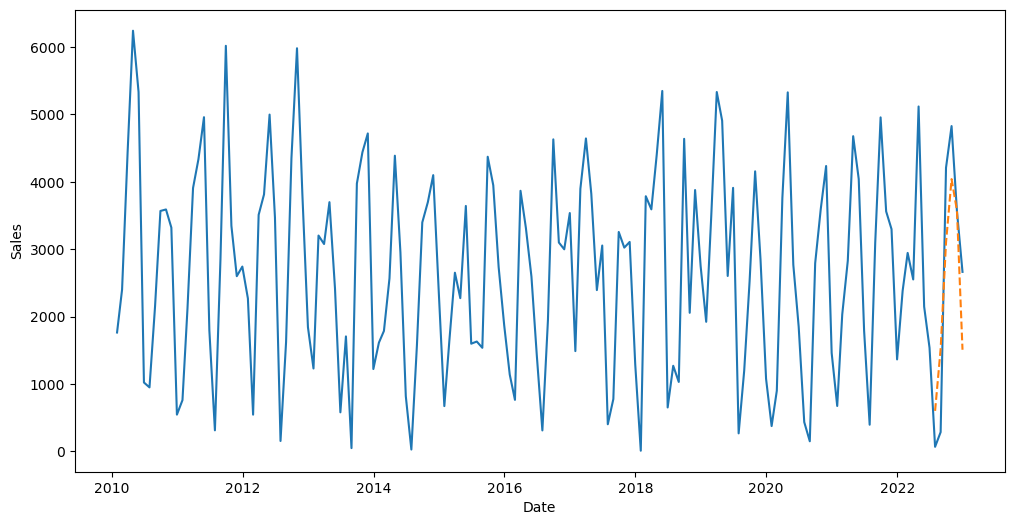

In [77]:
plt.figure(figsize=(12,6))
sns.lineplot(data = df, x = df.index, y = df['Sales'])
sns.lineplot(data = test, x = test.index, y = test['prediction_ARMA'], linestyle='--')

### 11. Evaluation Matrix

In [80]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score


mse = mean_squared_error(test['Sales'], test['prediction_ARMA'])

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate R2_Score
r2_score = r2_score(test['Sales'], test['prediction_ARMA'])

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f'r2_score: {r2_score}')

MSE: 832053.4595879014
RMSE: 912.1696440837644
r2_score: 0.753310913368484


### Printing the Diagnostics of the model

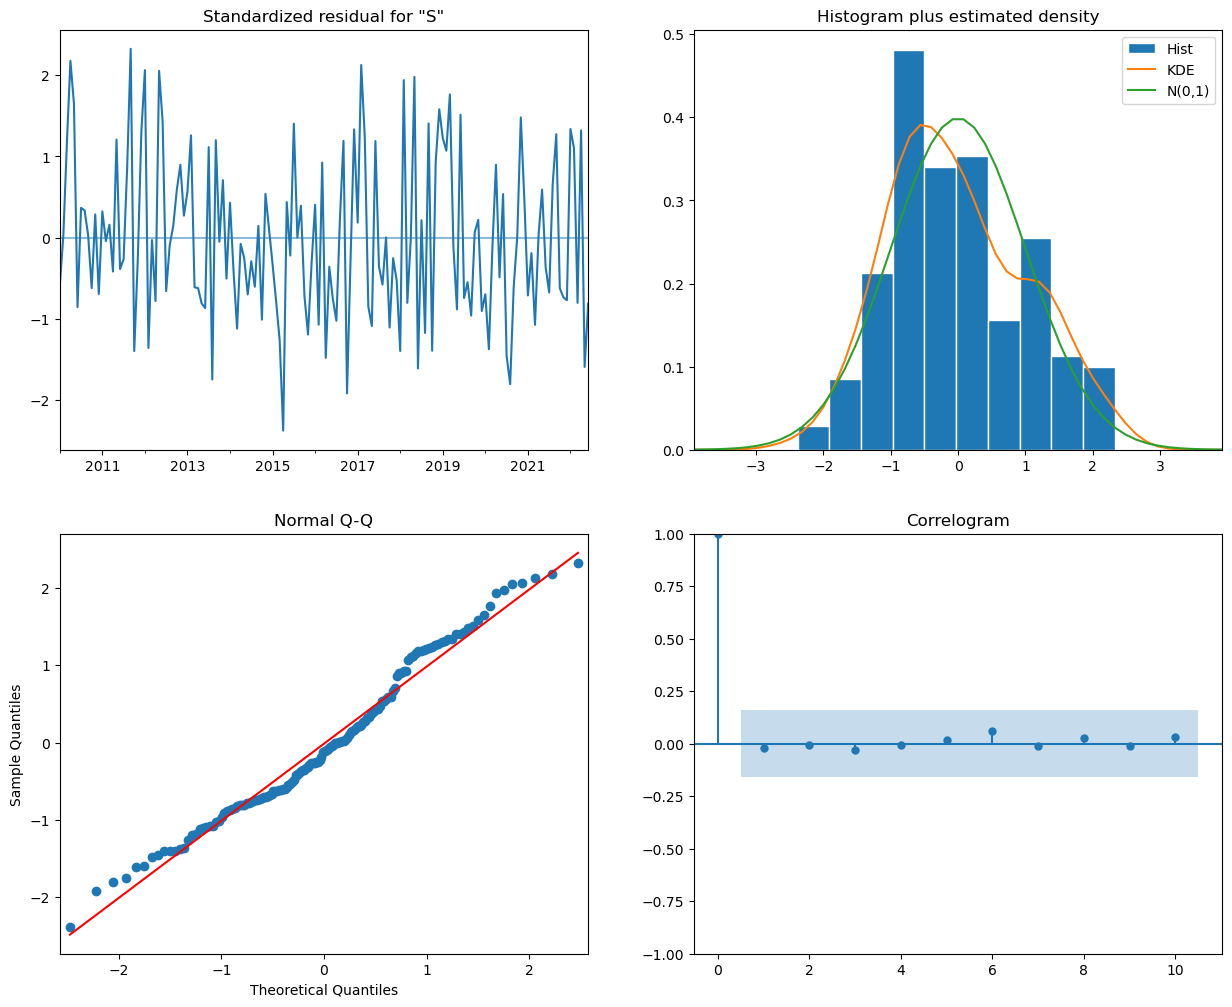

In [87]:
model.plot_diagnostics(figsize = (15,12))
plt.show()

In [66]:
order = (16, 0, 9)  # AR(4) model  the model takes (AR,I,MA)--> (p,d,q)
model = sm.tsa.ARIMA(train['Sales'], order=order)
results = model.fit()

# Print the model summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  150
Model:                ARIMA(16, 0, 9)   Log Likelihood               -1237.722
Date:                Mon, 12 Feb 2024   AIC                           2529.445
Time:                        20:41:40   BIC                           2610.732
Sample:                    01-31-2010   HQIC                          2562.469
                         - 06-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2673.7168     79.055     33.821      0.000    2518.772    2828.662
ar.L1         -0.2503      0.265     -0.944      0.345      -0.770       0.269
ar.L2          0.4126      0.247      1.673      0.0

AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) are statistical measures used to assess the goodness of fit of time series models. They balance model complexity and goodness of fit, with lower AIC and BIC values indicating better-fitting models